In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

In [46]:
df=pd.read_csv(r'C:\Users\majal\Downloads\archive (9)\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [47]:
df=pd.get_dummies(df, columns =['sex','smoker','region'])

In [48]:
df=df.astype(int)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               1338 non-null   int32
 1   bmi               1338 non-null   int32
 2   children          1338 non-null   int32
 3   charges           1338 non-null   int32
 4   sex_female        1338 non-null   int32
 5   sex_male          1338 non-null   int32
 6   smoker_no         1338 non-null   int32
 7   smoker_yes        1338 non-null   int32
 8   region_northeast  1338 non-null   int32
 9   region_northwest  1338 non-null   int32
 10  region_southeast  1338 non-null   int32
 11  region_southwest  1338 non-null   int32
dtypes: int32(12)
memory usage: 62.8 KB


In [50]:
df.isnull().sum()

age                 0
bmi                 0
children            0
charges             0
sex_female          0
sex_male            0
smoker_no           0
smoker_yes          0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

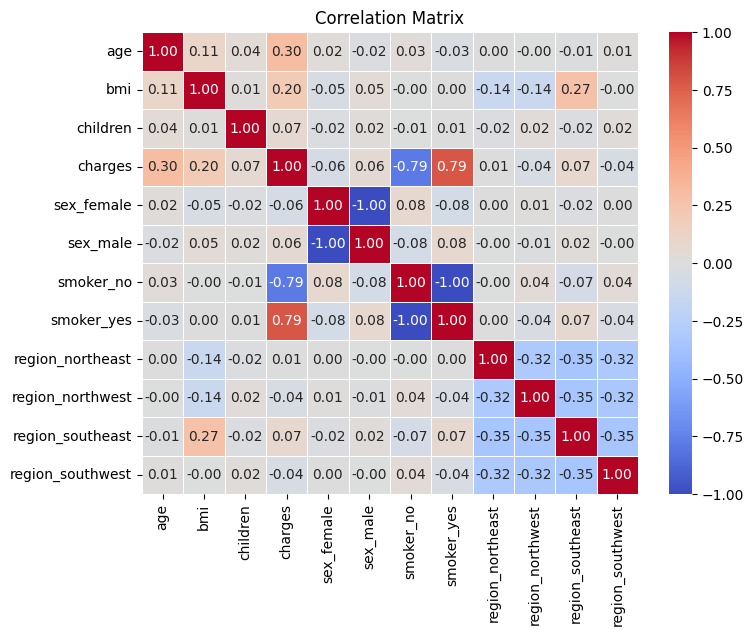

In [51]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<h3>Model</h3>

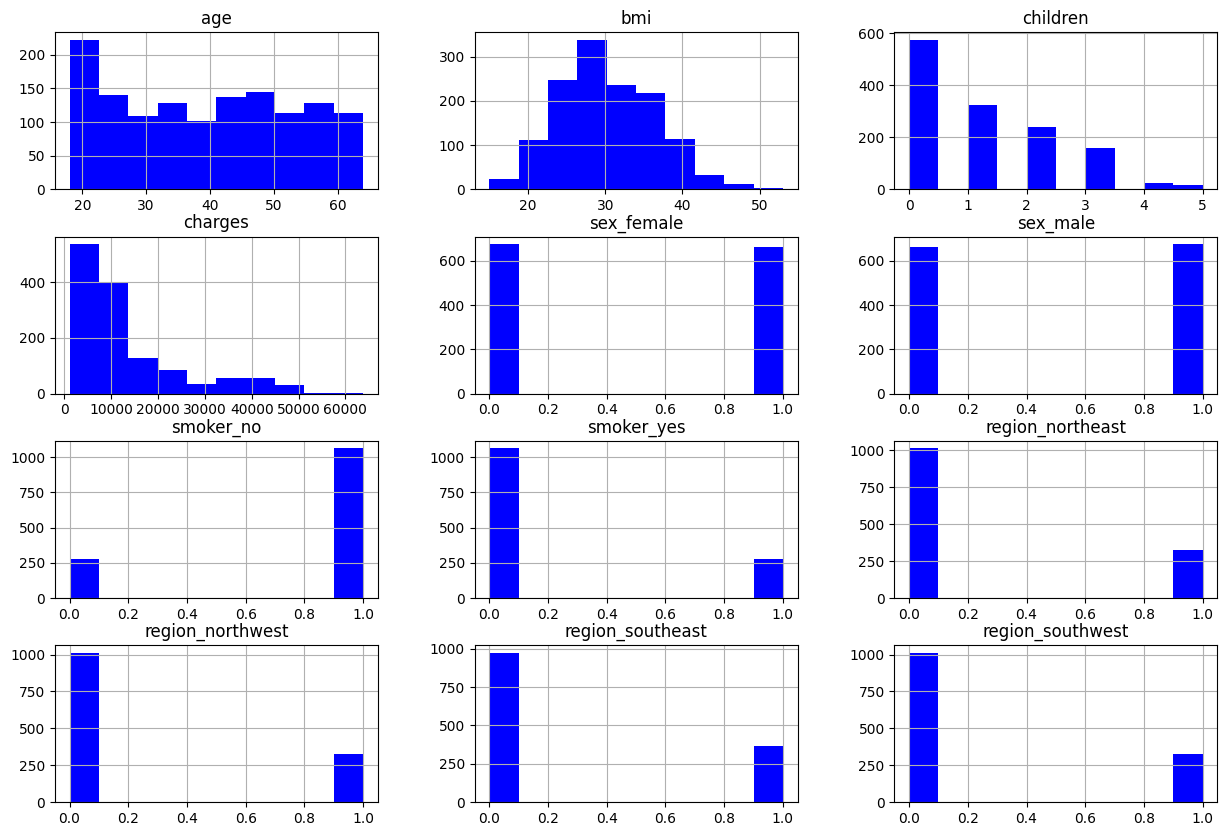

In [52]:
df.hist(bins=10,figsize=(15,10),color='blue')
plt.show()

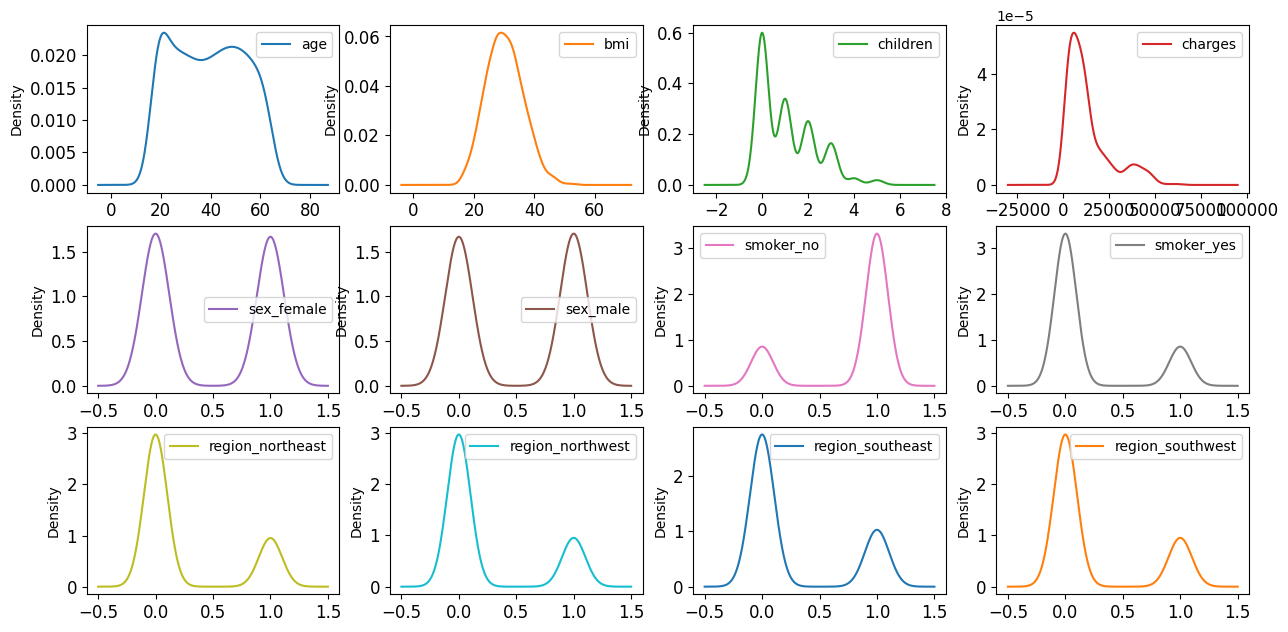

In [53]:
plt=df.plot(kind='density',subplots=True,layout=(4,4), sharex=False, sharey=False, fontsize=12, figsize=(15,10))

In [54]:
y=df['charges']
X=df.drop(['charges'], axis=1)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<h2>Linear Regression</h2>

In [57]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [58]:
linear_regression.score(X_test, y_test)

0.7697185338480848

In [59]:
predictions = linear_regression.predict(X_test)
print("Predictions on X_test:", predictions)


Predictions on X_test: [ 9.13327046e+03  7.19193639e+03  3.67539833e+04  9.45034387e+03
  2.68432476e+04  1.09130771e+04 -3.09541193e+01  1.70501466e+04
  1.06044084e+03  1.12770968e+04  2.80971174e+04  9.45713014e+03
  4.93846281e+03  3.84949565e+04  4.01827445e+04  3.69407326e+04
  1.51083447e+04  3.57116558e+04  9.03264359e+03  3.12670351e+04
  3.65635228e+03  1.02132518e+04  2.39724590e+03  7.14069847e+03
  1.14295417e+04  1.30683215e+04  1.47391927e+04  6.11529584e+03
  1.00034714e+04  2.09585036e+03  9.12759949e+03  1.30265190e+04
  4.16139935e+03  3.07516703e+03  4.65119819e+03  1.32590515e+04
  1.84540589e+03  8.63654056e+03  3.33482850e+04  3.25987441e+04
  3.71798646e+03  4.41541331e+03  1.41190292e+04  1.15721174e+04
  8.60321025e+03  1.22306421e+04  5.16553005e+03  3.04520917e+03
  3.52776659e+04  9.12354700e+03  1.58305645e+04  2.17318551e+03
  1.24860175e+04  1.68515651e+03  1.34151514e+04  1.29819660e+04
  4.47292105e+03  3.22964585e+04  1.35213574e+04  1.31546726e+04
  

In [60]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 33764845.8245149
R-squared (R2): 0.7697185338480848


In [61]:
coefficients = linear_regression.coef_

In [ ]:
for col, coef in zip(X.columns, coefficients):
    print(f'{col}: {coef}')
print(f'Intercept: {linear_regression.intercept_}')

Współczynnik dla age: 261.2832466339062
Współczynnik dla bmi: 347.63441407649015
Współczynnik dla children: 424.9695587187326
Współczynnik dla sex_female: -54.41920361742304
Współczynnik dla sex_male: 54.41920361742562
Współczynnik dla smoker_no: -11818.326809166603
Współczynnik dla smoker_yes: 11818.326809166603
Współczynnik dla region_northeast: 599.398280051821
Współczynnik dla region_northwest: 121.38046985069467
Współczynnik dla region_southeast: -380.44552011124966
Współczynnik dla region_southwest: -340.33322979126575
Intercept (punkt przecięcia z osią Y): -891.9273720792025


<h2>Lasso</h2>

In [63]:
from sklearn.linear_model import Lasso

In [64]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X, y)
linear_regression.score(X_test, y_test)

0.7697185338480848

In [65]:
predictions = linear_regression.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Polynomial Regression Model Results:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Polynomial Regression Model Results:
Mean Squared Error (MSE): 33764845.8245149
Root Mean Squared Error (RMSE): 5810.752603967485
R-squared (R²): 0.7697185338480848


<h2>Polynomial regression</h2>

In [66]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

linear_regression = LinearRegression()
linear_regression.fit(X_train_poly, y_train)

predictions = linear_regression.predict(X_test_poly)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Polynomial Regression Model Results:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Polynomial Regression Model Results:
Mean Squared Error (MSE): 20781108.72419883
Root Mean Squared Error (RMSE): 4558.630136806322
R-squared (R²): 0.858269627228792
